In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Simulate a sample college dataset
np.random.seed(42)

# Let's assume we have 100 colleges
n = 100
data = pd.DataFrame({
    'college_rank': np.random.randint(1, 200, n),          # Lower rank = more prestigious
    'avg_sat_score': np.random.randint(1000, 1600, n),
    'acceptance_rate': np.random.uniform(0.1, 0.9, n),
    'private': np.random.choice([0, 1], size=n),           # 1 = private, 0 = public
    'tuition': None  # Will calculate this below
})

# Create tuition using a simple formula + noise
data['tuition'] = (
    50000 - data['college_rank'] * 100
    + data['avg_sat_score'] * 20
    - data['acceptance_rate'] * 10000
    + data['private'] * 10000
    + np.random.normal(0, 5000, n)  # add noise
)

# Optional: quick check
print(data.head())

# Step 2: Linear Regression using statsmodels
X = data[['college_rank', 'avg_sat_score', 'acceptance_rate', 'private']]
y = data['tuition']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Step 3: Show the summary
print(model.summary())

   college_rank  avg_sat_score  acceptance_rate  private       tuition
0           103           1064         0.290110        1  64769.967324
1           180           1520         0.682573        1  69836.435885
2            93           1343         0.394227        1  69655.131246
3            15           1128         0.605845        1  74427.871148
4           107           1471         0.606824        1  75176.698709
                            OLS Regression Results                            
Dep. Variable:                tuition   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     101.4
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.07e-33
Time:                        14:26:48   Log-Likelihood:                -985.25
No. Observations:                 100   AIC:                             1980.
Df Residuals:        

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Features and target
features = ['college_rank', 'avg_sat_score', 'acceptance_rate', 'private']
X = data[features]
y = data['tuition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Fit decision tree
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, y_train)

# Predict
dtree_preds = dtree.predict(X_test)

In [28]:
# Fit random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
rf_preds = rf.predict(X_test)

In [30]:
from sklearn.metrics import r2_score, root_mean_squared_error

# For Decision Tree
print("Decision Tree R²:", r2_score(y_test, dtree_preds))
print("Decision Tree RMSE:", root_mean_squared_error(y_test, dtree_preds))

# For Random Forest
print("Random Forest R²:", r2_score(y_test, rf_preds))
print("Random Forest RMSE:", root_mean_squared_error(y_test, rf_preds))

Decision Tree R²: 0.4431779542565918
Decision Tree RMSE: 8767.579344122478
Random Forest R²: 0.6842402141938284
Random Forest RMSE: 6602.370679189216


In [32]:
from sklearn.metrics import mean_absolute_error

# Decision Tree
print("Decision Tree MAE:", mean_absolute_error(y_test, dtree_preds))

# Random Forest
print("Random Forest MAE:", mean_absolute_error(y_test, rf_preds))

Decision Tree MAE: 7319.065988084292
Random Forest MAE: 5749.2860218893475


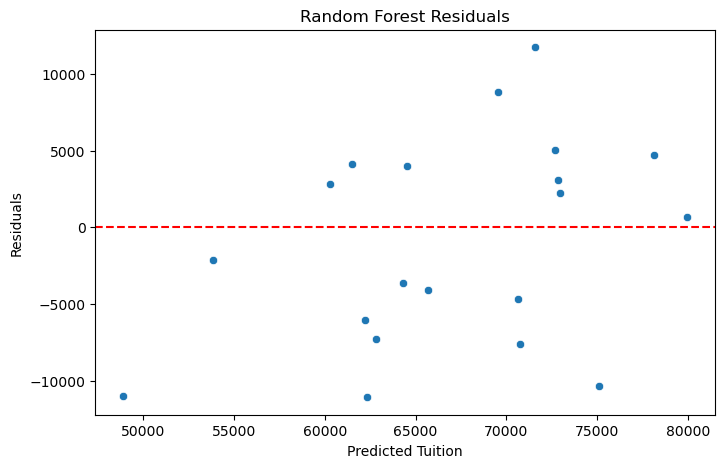

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - rf_preds

plt.figure(figsize=(8, 5))
sns.scatterplot(x=rf_preds, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Random Forest Residuals")
plt.xlabel("Predicted Tuition")
plt.ylabel("Residuals")
plt.show()

In [36]:
import joblib

# Save the model
joblib.dump(rf, "random_forest_model.pkl")

['random_forest_model.pkl']

In [38]:
# Load the model
loaded_model = joblib.load("random_forest_model.pkl")

# Predict new data
sample = X_test.iloc[[0]]  # example row
predicted_tuition = loaded_model.predict(sample)
print("Predicted tuition:", predicted_tuition[0])

Predicted tuition: 60275.69810402429
